In [1]:
# 2018-02-08  11:00 PM Version

## Examples for folium and geopandas

#### If the cell below runs without error, you've installed geopandas and folium correctly!

If there is an error, then perhaps you didn't activate your class conda environment before running 'jupyter notebook' from the command line? Remember: You want to do this from _conda_ not _canopy_. 

In [2]:
import folium
import geopandas
%matplotlib inline

Once you're sure your imports are working, have fun exploring!

Here are some references relevant to the cells below.

http://geopandas.org/       # geopandas is a lightweight GIS in of itself!

https://github.com/python-visualization/folium

http://python-visualization.github.io/folium/

#### Let's use Folium to create a web map of Red Square and the Sherman Lab

In [3]:
import folium

map_osm = folium.Map(location=[47.655914, -122.309646],zoom_start=17)   # Open up a web map of red square
folium.Marker([47.656911, -122.3069518], popup='Sherman Lab').add_to(map_osm) # Add a marker for the Sherman Lab
map_osm.save('osm-UW.html')  # write it out to html on disk
map_osm                      # display interactive map of UW campus in the notebook below


If the above works, go to your working directory (where you ran 'jupyter notebook' from on the command line) in the Windows file explorer and open up _osm-UW.html_ in the web browser!

It should be a web version of map above. In a lab, you will put such a map up on the web, instead of just having it be accessible from your local drive.

#### Exploring Geopandas

In [4]:
import geopandas

%matplotlib inline
# tells the plotting library to show us graphics here

_GeoPandas_ is effectively a miniature Python-based open-source GIS. It achieves much of its functionality by wrapping (making use of) existing non-spatial libraries, adding some GIS-specific aspects along the way.

The most powerful new data type introduced by _GeoPandas_ is the _GeoDataFrame_ (specific instances of such data types sometimes have _gdf_ in their variable names, you might notice.) The _GeoDataFrame_ builds spatial functionality into the _DataFrame_--which is a data type introduced in the (non-spatial) data science package called _Pandas_. Pandas dataframes have similarities to a central data type in the language _R_.

A _GeoDataFrame_ is essentially a big spatial database table of the sort you see in the results of this next code cell. It bears some similarities to ArcGIS's tables, but it's much easier to make simple manipulations of this table within Python than it is using ArcPy on ArcMap tables--no cursors are required and a lot of the syntax is simpler. Operations on GeoDataFrame often build in loops so you don't have to write them yourself.

In [5]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
    # NaturalEarth is a free dataset that comes with geopandas.
    #    See: http://www.naturalearthdata.com/ 
    # We could have just used a string with the filename of a shapefile there,
    #    instead of geopandas.datasets.get_path('naturalearth_lowres').

world.head(7) # show us the data for the first seven polygons (countries) in the file

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...


Now, we will create a new field in the GeoDataFrame (or overwrite an old one) called 'GDPpercapita'.

The data we put into the column for a given row is the result of dividing that row's value for two existing columns in the table, 'gdp_md_est'/'pop_est'

In [6]:
world['GDPpercapita'] = 10**6 * world['gdp_md_est']/world['pop_est']
# The 10**6 is just there because the units of gdp_md_est are 'millions of dollars' and 
#   I want the GDP/capita to be in $/person not millions-of-$/person.

world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,GDPpercapita
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",784.154930
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,8617.663491
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",5992.658787
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",38407.907819
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,14027.126052


This just lets you see what your column names are.

In [7]:
world.columns

Index([     u'pop_est',    u'continent',         u'name',       u'iso_a3',
         u'gdp_md_est',     u'geometry', u'GDPpercapita'],
      dtype='object')

If we want, we can just look at a single column of the data:

In [8]:
world['name'].head(10)

0               Afghanistan
1                    Angola
2                   Albania
3      United Arab Emirates
4                 Argentina
5                   Armenia
6                Antarctica
7    Fr. S. Antarctic Lands
8                 Australia
9                   Austria
Name: name, dtype: object

Or we can use the _.iloc_ method to look at a single (range of) rows. Here, the rows are countries:

In [9]:
world.iloc[30]

pop_est                                               1.33861e+09
continent                                                    Asia
name                                                        China
iso_a3                                                        CHN
gdp_md_est                                              7.973e+06
geometry        (POLYGON ((110.3391878601516 18.67839508714761...
GDPpercapita                                              5956.17
Name: 30, dtype: object

And here's a different way of getting a single row  (akin to the Select by Attribute example above)

In [10]:
world[ world['name']=='China' ]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,GDPpercapita
30,1.338613e+09,Asia,China,CHN,7973000.0,(POLYGON ((110.3391878601516 18.67839508714761...,5956.165209


Plotting the data in the GeoDataFrame is simple enough, if you only want something simple.

Other plotting libraries/approaches can be easier to make more customized outputs.

Remember the _basemap_ library, for example?

Sometimes you can combine the outputs of several plotting libraries, though---

Here, GeoPandas is wrapping Pandas and some basic _MatPlotLib_ (plotting) functionality, so you can use options for configuring your plots that _MatPlotLib_ provides.

This means that to do anything complicated with plotting, you can dive into _matplotlib_ examples and documentation.

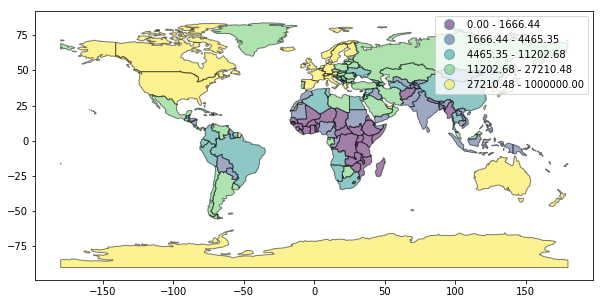

In [11]:
world.plot(column="GDPpercapita",scheme='quantiles',k=5,legend=True,figsize=(10,5))

Let's reproject the data and change the 'colormap'

Here, we are borrowing functionality from fiona, another geospatial python library.

Fiona is actually a python wrapper for gdal/ogr. See: http://toblerity.org/fiona/manual.html

In particular, we want to get a Coordinate Reference System string that will correspond to a
specific Euler projection defined in a 'proj4' format string: "+proj=euler +lat_1=67 +lat_2=75"

Once we have put the projection into a format GeoPandas can understand, we can reproject the existing GeoDataFrame. The _inplace=True_ in the code below means the existing GeoDataFrame called 'world' is modified, instead of us needing to assign the result of the method/function to a new variable.

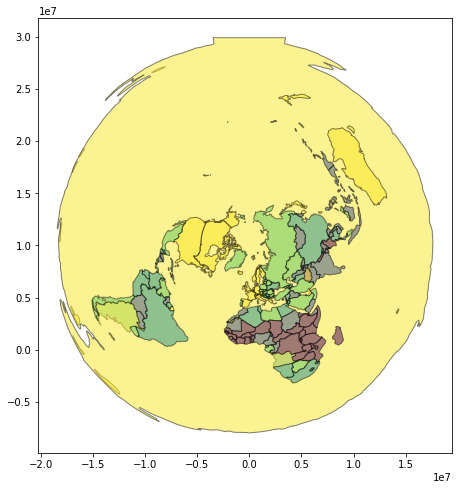

In [12]:
import fiona
import fiona.crs
EulerCRS = fiona.crs.from_string("+proj=euler +lat_1=67 +lat_2=75")

world.to_crs(crs=EulerCRS, inplace=True)

world.plot(column="GDPpercapita",scheme='quantiles',k=5,figsize=(8,8))

#### Wait, what went wrong?

.

.

.

.

.

...Antarctica has been flipped inside-out! The interior of Antarctica is now covering the whole planet and what used to be the interior of Antarctica is now an ocean. Oops! This is a result from the interaction of our particular data, the projection, and the drawing algorithm. The easiest way to revolve this issue is to remove Antarctica...

In [13]:
# Let's see how we create a GeoDataFrame that has that particular record removed from it...

# This command doesn't get us there, but it helps. Why?
(world['name'] != 'Antarctica').head(10)

0     True
1     True
2     True
3     True
4     True
5     True
6    False
7     True
8     True
9     True
Name: name, dtype: bool

Here's the geodataframe without Antarctica

In [14]:
worldWithoutAntarctica = world[(world['name'] != 'Antarctica')]

Wow! We've essentially just done a 'select by attribute' command with a single line of code.

We've selected everything that doesn't have the name be Antarctica...

Let's call a map of the resulting data 'polarplot'...

Compare these results to the ones above!

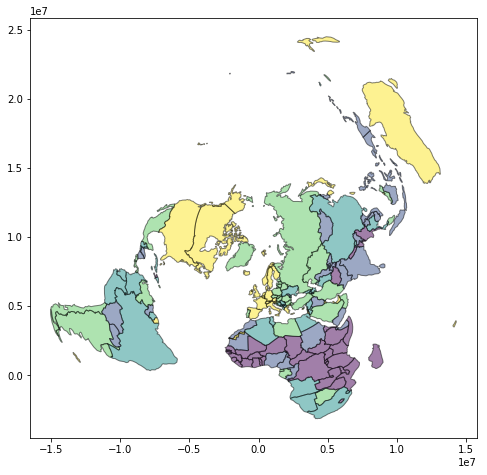

In [15]:
polarplot = worldWithoutAntarctica.plot(
    column="GDPpercapita",
    scheme='quantiles',k=5,
    figsize=(8,8))

Much better, right?

### Now, let's work on the data from The First ArcPy Lab

For this to work, you need to have your "saep_bg10.shp" from the First ArcPy Lab in the same directory as this .ipynb file. Otherwise, you need to write out a full path,
e.g., "C:/Users/lrb9/Downloads/saep_bg10.shp" instead of "saep_bg10.shp"

Below, you'll also need the "WashingtonFIPS.dbf" file, so you might as well download that too.

In [16]:
import geopandas
%matplotlib inline

WA_bg = geopandas.read_file("saep_bg10.shp")
WA_bg.head(7) # show us the first seven block groups

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,INTPTLON10,INTPTLAT10,...,OHU2013,OHU2014,OHU2015,OHU2016,OHU2017,COHU00_10,PCOHU00_10,COHU10_17,PCOHU10_17,geometry
0,53,001,950100,1,530019501001,Block Group 1,G5030,S,-118.398815,47.150809,...,273.880,278.121,279.551,286.218,286.634,33.751,0.143,16.634,0.062,"POLYGON ((2077217.074095237 640954.0110817049,..."
1,53,001,950100,2,530019501002,Block Group 2,G5030,S,-118.351143,47.135101,...,528.635,524.831,521.228,517.427,516.077,3.398,0.007,-8.923,-0.017,"POLYGON ((2165913.051240579 657352.8005365322,..."
2,53,001,950100,3,530019501003,Block Group 3,G5030,S,-118.382148,47.138222,...,246.478,246.344,243.965,242.033,241.365,-26.312,-0.097,-4.635,-0.019,"POLYGON ((2166254.454566129 657810.7137267586,..."
3,53,001,950200,1,530019502001,Block Group 1,G5030,S,-118.219484,46.874027,...,208.360,209.153,203.991,205.732,204.776,-21.255,-0.093,-3.224,-0.015,"POLYGON ((2150159.78406948 554295.8999707696, ..."
4,53,001,950200,2,530019502002,Block Group 2,G5030,S,-118.522323,46.968569,...,289.637,285.786,285.793,277.940,278.102,-1.330,-0.005,-11.898,-0.041,"POLYGON ((2082999.834788324 575018.8611698836,..."
5,53,001,950200,3,530019502003,Block Group 3,G5030,S,-118.753068,46.939578,...,202.737,203.734,203.426,205.478,207.835,7.794,0.040,6.835,0.034,"POLYGON ((2035544.166963593 579401.9638070536,..."
6,53,001,950300,1,530019503001,Block Group 1,G5030,S,-119.181622,46.789076,...,484.564,486.441,487.811,495.009,497.718,63.533,0.158,31.718,0.068,"POLYGON ((1962342.779850264 530894.4193513815,..."


Let's recalculate the population densities ourselves.

Then, let's plot them using a new colormap. This is done most easily by setting the _cmap_ parameter, as below. Want other colormaps?

* Matplotlib has some: http://matplotlib.org/users/colormaps.html   Below, we are using one of them, pretending population is elevation. It doesn't work very convincingly.

* But if you _import seaborn_, you get even more colormaps, more thoughtfully composed. See: http://seaborn.pydata.org/tutorial/color_palettes.html Notice that many of the palettes on that page need a parameter that makes them into the proper format for _cmap_ to be used below:

      cmap=sns.cubehelix_palette(light=1, as_cmap=True)
      
What about other choropleth classification schemes? See: http://pysal.readthedocs.io/en/latest/library/esda/mapclassify.html

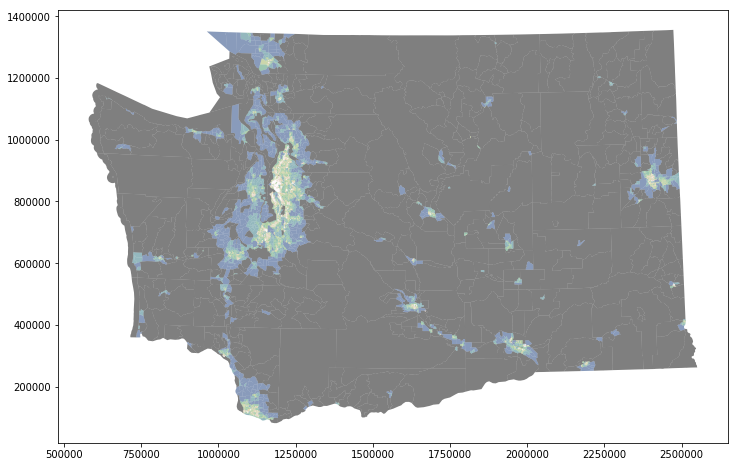

In [17]:
WA_bg['PopDens2016new'] = WA_bg.POP2016 / (WA_bg.ALANDMI + 10**-8)
# the part that says: + 10**-8
# ...is just there to make sure that block groups that don't have any land area don't create
# a divide-by-zero problem. 10**-8 is a tiny number compared to the land areas,
# so it won't affect our answers negatively.

WA_bg.plot(column="PopDens2016new",
           scheme='Quantiles',k=9,
           linewidth=0.0,
           figsize=(12,8),
           cmap="gist_earth")

Let's join the FIPS/CountyName table to the shapefile, as many of you did in the lab.

GeoDataFrames have a method called 'merge' that we can use to do this. See: 

Note: Unfortunately, terminologically, this is not the same thing as what ArcGIS means by 'merge'. See 

For the expanded set of possibilities (inner joins, outer joins, etc.) in pandas tables, see: http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging

First, let's print the initial GeoDataFrame with the WashingtonFIPS.dbf data to take a look.

In [18]:
FIPS_to_CountyNames_gdf = geopandas.read_file("WashingtonFIPS.dbf")
print "Initial table: "
print FIPS_to_CountyNames_gdf.head()

Initial table: 
  CountyName FIPSCounty geometry
0      Adams        001     None
1     Asotin        003     None
2     Benton        005     None
3     Chelan        007     None
4    Clallam        009     None


I notice two things: Since _merge_ seems to want both tables to have the same key name, so let's rename one of them. I'll rename the FIPSCounty column to have the same name as how the data is stored within the Shapefile. I could have also just copied it instead:

     FIPS_to_CountyNames_gdf['COUNTYFP10] = FIPS_to_CountyNames_gdf['FIPSCounty']

Also, there's a _geometry_ column that's blank. We should get rid of it. Why do we have it? I have inappropriately loaded a non-spatial datafile within a GeoDataFrame. WashingtonFIPS.dbf is really more appropriate to being stored in a Pandas DataFrame not a GeoPandas GeoDataFrame, but Pandas doesn't seem to have the option to import the legacy data format _.dbf_ directly, so I have loaded it within GeoPandas and will now  also delete the geometry column the GeoDataFrame has made because our data doesn't need it. 

In [19]:
FIPS_to_CountyNames_gdf.rename(columns={'FIPSCounty':'COUNTYFP10'},inplace=True)

FIPS_to_CountyNames_gdf.drop('geometry', axis=1, inplace=True)
# The axis setting here determines whether I am dropping a row or a column...

print
print "After preparation for merge (join): "
print FIPS_to_CountyNames_gdf.head()


After preparation for merge (join): 
  CountyName COUNTYFP10
0      Adams        001
1     Asotin        003
2     Benton        005
3     Chelan        007
4    Clallam        009


In [20]:
# Now, let's do the Join (known here as the Merge)
JOINING_KEY = 'COUNTYFP10'
WA_bg_with_CountyName = WA_bg.merge(FIPS_to_CountyNames_gdf, on=JOINING_KEY)
WA_bg_with_CountyName.head()  

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,INTPTLON10,INTPTLAT10,...,OHU2015,OHU2016,OHU2017,COHU00_10,PCOHU00_10,COHU10_17,PCOHU10_17,geometry,PopDens2016new,CountyName
0,53,001,950100,1,530019501001,Block Group 1,G5030,S,-118.398815,47.150809,...,279.551,286.218,286.634,33.751,0.143,16.634,0.062,"POLYGON ((2077217.074095237 640954.0110817049,...",1.266011,Adams
1,53,001,950100,2,530019501002,Block Group 2,G5030,S,-118.351143,47.135101,...,521.228,517.427,516.077,3.398,0.007,-8.923,-0.017,"POLYGON ((2165913.051240579 657352.8005365322,...",305.592474,Adams
2,53,001,950100,3,530019501003,Block Group 3,G5030,S,-118.382148,47.138222,...,243.965,242.033,241.365,-26.312,-0.097,-4.635,-0.019,"POLYGON ((2166254.454566129 657810.7137267586,...",169.796353,Adams
3,53,001,950200,1,530019502001,Block Group 1,G5030,S,-118.219484,46.874027,...,203.991,205.732,204.776,-21.255,-0.093,-3.224,-0.015,"POLYGON ((2150159.78406948 554295.8999707696, ...",1.021121,Adams
4,53,001,950200,2,530019502002,Block Group 2,G5030,S,-118.522323,46.968569,...,285.793,277.940,278.102,-1.330,-0.005,-11.898,-0.041,"POLYGON ((2082999.834788324 575018.8611698836,...",5.202806,Adams


Look to the far right end of the table above for the new fields!

#### We can use the above joined data to work on the first question of the First ArcPy Lab.

If we want to just look at the block rows (rows) in King county, we can select out those rows with the "CountyName" column having the value "King" and run a .plot method on the resulting GeoDataFrame, all in one line!

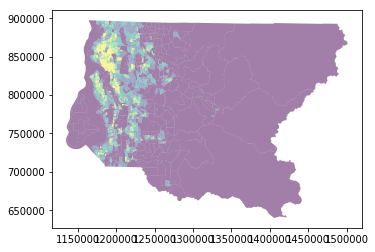

In [21]:
WA_bg_with_CountyName[ WA_bg_with_CountyName['CountyName'] == "King" ].plot(
    column="PopDens2016new",
    linewidth=0.0,
    scheme='quantiles',k=5)

Now that we have the names joined to our table, we can do the first question in the First ArcPy Lab by using a loop on the county names, selecting out those records where the _CountyName_ is equal to the county of interest in the current iteration fo the loop.

Note that the loop is run over *FIPS_to_CountyNames_gdf['CountyName']* instead of over *WA_bg_with_CountyName['CountyName']*, because running the loop on the latter would result in  us making thousands of duplicate selections/files on top of each other. 

*FIPS_to_CountyNames_gdf['CountyName']* just has all the names once.


In [22]:
WA_bg_with_CountyName_wgs84 = WA_bg_with_CountyName.to_crs(epsg=4326)
# First, change data back to WGS1984 so we don't confuse GeoJSON readers that don't realize 
#   GeoJSON is supposed to have the ability to store data in projections other than WGS1984. 

import os    

for county in FIPS_to_CountyNames_gdf['CountyName']:
    filename_to_output = county+".geojson"
    print "Outputting "+filename_to_output
    try: 
        os.remove(filename_to_output)
    except OSError:
        pass
    (WA_bg_with_CountyName_wgs84[WA_bg_with_CountyName['CountyName'] == county]
     .to_file(filename_to_output,driver="GeoJSON"))

    # the .to_file() method of a GeoDataFrame writes it out to a Shapefile (or, in this case,
    #  when I set the driver="GEOSJON", so a GeoJSON file.)
    
    # Note the whole try/except business is just because the to_file throws an error if 
    #  the file already exists, so we delete it manually.

Outputting Adams.geojson
Outputting Asotin.geojson
Outputting Benton.geojson
Outputting Chelan.geojson
Outputting Clallam.geojson
Outputting Clark.geojson
Outputting Columbia.geojson
Outputting Cowlitz.geojson
Outputting Douglas.geojson
Outputting Ferry.geojson
Outputting Franklin.geojson
Outputting Garfield.geojson
Outputting Grant.geojson
Outputting Grays Harbor.geojson
Outputting Island.geojson
Outputting Jefferson.geojson
Outputting King.geojson
Outputting Kitsap.geojson
Outputting Kittitas.geojson
Outputting Klickitat.geojson
Outputting Lewis.geojson
Outputting Lincoln.geojson
Outputting Mason.geojson
Outputting Okanogan.geojson
Outputting Pacific.geojson
Outputting Pend Oreille.geojson
Outputting Pierce.geojson
Outputting San Juan.geojson
Outputting Skagit.geojson
Outputting Skamania.geojson
Outputting Snohomish.geojson
Outputting Spokane.geojson
Outputting Stevens.geojson
Outputting Thurston.geojson
Outputting Wahkiakum.geojson
Outputting Walla Walla.geojson
Outputting Whatcom.g

#### First ArcPy Lab Question 2

This one is a bit more subtle, but quite pleasing. It involves a number of methods being
'chained', with the results of one such function being objects to which new methods are then applied in succession. I could have done this in five separate statements, assigning values to intermediate variables, but this was easier.

There is a groupby method to [Geo]Pandas [Geo]DataFrames that is very powerful and is key to what I have done below. You might want to read about this method.

* Example: http://chrisalbon.com/python/pandas_apply_operations_to_groups.html

Here, I have groupby() group the data by different values within CountyName.

The resulting group object can then have an operator like sum() applied to it, which actually means that sum() is applied to each of the groups in succession. It's like a loop. The result is that I get back a DataFrame that has summed up values for all the columns within each of the counties. If you want to see that result, run the command in the cell after this one. Here, though, I only want 'POP2016' sums for each county, so I can select out that column with a ['POP2016'] and then sort them.

In [23]:
(WA_bg_with_CountyName_wgs84
 .groupby(["CountyName"])
 .sum()['POP2016']
 .sort_values(ascending=False)
)[:10]

CountyName
King         2105100.0
Pierce        844490.0
Snohomish     772860.0
Spokane       492530.0
Clark         461010.0
Thurston      272690.0
Kitsap        262590.0
Yakima        250900.0
Whatcom       212540.0
Benton        190500.0
Name: POP2016, dtype: float64

As referenced in the previous Markdown text cell, this code shows the total land areas, populations, etc. in each county by adding up the values for these columns across block groups. Note that the results make sense for populations, but not for population densities! Densities don't add, so you would have to recalculate them. But [Geo]Pandas doesn't know that or tell you that. You have to be thinking about it yourself.

In [24]:
(WA_bg_with_CountyName_wgs84
 .groupby(["CountyName"])
 .sum()
 .head(15))

,INTPTLON10,INTPTLAT10,ALANDM,AWATERM,ALANDMI,AWATERMI,POP2000,POP2001,POP2002,POP2003,...,OHU2013,OHU2014,OHU2015,OHU2016,OHU2017,COHU00_10,PCOHU00_10,COHU10_17,PCOHU10_17,PopDens2016new
CountyName,,,,,,,,,,,,,,,,,,,,,
Adams,-1783.241959,703.539615,4985668796,12623299,1924.976,4.876,16428.0,16699.0,16911.0,17081.0,...,5829.539,5874.370,5897.916,5943.676,6061.102,491.0,1.208,341.102,0.716,1.001759e+04
Asotin,-2458.724464,973.854443,1647784012,11475136,636.213,4.431,20551.0,20650.0,20652.0,20709.0,...,9264.188,9283.204,9325.093,9375.014,9389.341,872.0,2.072,153.341,0.344,5.286113e+04
Benton,-16340.679871,6333.801456,4403961281,154412831,1700.377,59.621,142475.0,145267.0,148290.0,151933.0,...,68258.919,69351.484,70304.921,70943.454,72042.554,12438.0,235.009,6738.554,19.092,4.031373e+05
Chelan,-6619.222610,2615.661861,7564124657,189992686,2920.525,73.357,66616.0,66896.0,67400.0,67507.0,...,28188.680,28603.175,28785.662,29017.416,29320.788,2806.0,5.869,1493.788,3.649,1.469448e+05
Clallam,-6794.699436,2644.975556,4502251295,2414668004,1738.329,932.307,64179.0,64717.0,65398.0,65928.0,...,31697.454,31755.241,31848.439,32108.776,32371.519,4165.0,6.852,1042.519,1.408,6.047853e+04
Clark,-34318.085045,12789.576721,1629112686,70523141,629.008,27.228,345238.0,352715.0,364855.0,374091.0,...,161100.144,163424.296,165946.749,168926.025,172453.407,30891.0,113.327,14354.407,23.153,1.074645e+06
Columbia,-589.768906,231.593758,2249738808,12566851,868.629,4.853,4064.0,4114.0,4115.0,4111.0,...,1771.257,1772.547,1786.257,1785.510,1793.903,75.0,0.307,31.903,0.105,3.490509e+02
Cowlitz,-10938.048404,4107.083189,2952910628,67563094,1140.123,26.086,92948.0,94081.0,94854.0,95849.0,...,40503.913,40636.158,40849.807,41087.815,41383.642,4394.0,10.907,1139.642,2.182,2.517525e+05
Douglas,-3484.035565,1378.239060,4711872269,76122749,1819.263,29.393,32603.0,32817.0,32871.0,33545.0,...,14118.440,14214.008,14355.287,14503.801,14664.278,2168.0,4.844,770.278,1.618,6.015436e+04


### Exploring individual geometry objects:    Storing them, doing spatial analysis on them, and mapping them 

Below, we create two geometry Points, a class / data type defined by the Python library _Shapely_.

GeoPandas uses Shapely geometry objects for its geometry columns. We will not put them in a geometry column within a GeoDataFrame, though. Instead, later, we'll store them in a GeoSeries, which is just a geometry column by itself. A [Geo]Series is like a sophisticated python List. Note: Pandas just has Series; GeoPandas has GeoSeries.

In [25]:
import shapely
import shapely.geometry
import fiona
import fiona.crs

RedSquarePoint_LongLat = (-122.309646,47.655914)   
ShermanLabPoint_LongLat = ( -122.3069518,47.656911)

RedSquarePoint = shapely.geometry.Point(RedSquarePoint_LongLat[0],RedSquarePoint_LongLat[1])
ShermanLabPoint = shapely.geometry.Point(ShermanLabPoint_LongLat[0],ShermanLabPoint_LongLat[1])

print "Red Square's Point in long-lat is: " + str(RedSquarePoint)
print "Sherman Lab's Point in long-lat is: " + str(ShermanLabPoint)
print
print "Their distance in long-lat is: " + str(RedSquarePoint.distance(ShermanLabPoint))
print "...but wait. You can't actually measure a valid distance in long-lat!"
print "(At least you can't without using a distance function from spherical geometry.)"
print
print "So, let's project the data into Washington State Plane North so we can measure"
print "a distance in a linear unit of measurement: feet."

Red Square's Point in long-lat is: POINT (-122.309646 47.655914)
Sherman Lab's Point in long-lat is: POINT (-122.3069518 47.656911)

Their distance in long-lat is: 0.00287275523497
...but wait. You can't actually measure a valid distance in long-lat!
(At least you can't without using a distance function from spherical geometry.)

So, let's project the data into Washington State Plane North so we can measure
a distance in a linear unit of measurement: feet.


Here is one way you can define a GeoSeries from scratch.

Note: The RedSquarePoint and ShermanLabPoint are Shapely objects defined above.

Note: I've also set the indexes (like the FID/OID in a GIS table) to be something meaningful, not just numbers 0 and 1.

In [26]:
UW_points_geoseries_WGS84 = geopandas.GeoSeries(
    [RedSquarePoint, ShermanLabPoint],
    index=["RedSquare","ShermanLab"],
)
UW_points_geoseries_WGS84.crs = fiona.crs.from_epsg(4326)  # define the CRS properly: WGS84.

print "UW points in Long-Lat, stored in a GeoSeries: "
print UW_points_geoseries_WGS84
print

# Let's convert the coordinates to Washington State Plane North, then.
# This is EPSG:2285 for feet. See: http://www.spatialreference.org/ref/epsg/2285/
UW_points_geoseries_WA_N = UW_points_geoseries_WGS84.to_crs(epsg=2285)

print "UW points in Washington State Plane North (feet), stored in a GeoSeries: "
print UW_points_geoseries_WA_N
distance_in_feet = (UW_points_geoseries_WA_N['RedSquare'].distance(
                        UW_points_geoseries_WA_N['ShermanLab'])
                   )
print "Their distance in feet: " + str(distance_in_feet)
print
print "Note: This obviously assumes you can pass through Gowan Hall."
print "It's therefore only an approximation."

UW points in Long-Lat, stored in a GeoSeries: 
RedSquare      POINT (-122.309646 47.655914)
ShermanLab    POINT (-122.3069518 47.656911)
dtype: object

UW points in Washington State Plane North (feet), stored in a GeoSeries: 
RedSquare     POINT (1276600.731562104 242747.0386449746)
ShermanLab    POINT (1277271.560418896 243097.9180199492)
dtype: object
Their distance in feet: 757.051973703

Note: This obviously assumes you can pass through Gowan Hall.
It's therefore only an approximation.


Try your own experiments! Here's one involving buffers:

In [27]:
buffer_around_UW_points = UW_points_geoseries_WA_N.buffer(300)
buffer_around_UW_points

RedSquare     POLYGON ((1276900.731562104 242747.0386449746,...
ShermanLab    POLYGON ((1277571.560418896 243097.9180199492,...
dtype: object

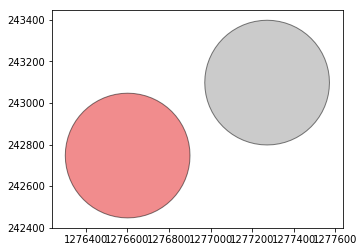

In [28]:
buffer_around_UW_points.plot()

Note that you can add GeoJSON to your folium maps! You can make GeoPandas data into GeoJSON with the .to_json() method. Just be sure you project the GeoPandas data back to lat-long/WGS1984 (epsg=4326) first!

In [35]:
import folium

map_osm_buffers = folium.Map(location=[47.655914, -122.309646],
                            zoom_start=17,
                            tiles='cartodbpositron')

buffers = folium.features.GeoJson(
    buffer_around_UW_points.to_crs(epsg=4326).to_json()
)

map_osm_buffers.add_child(buffers)
map_osm_buffers

### [Geo]DataFrames: Making them, importing them, exporting them.

If you have just a little bit of data, you can define a DataFrame pretty easily. Note that what I do is define a dictionary whose keys are strings (which are to be column names) and whose values are lists (which are to be the attribute values). _pandas.DataFrame()_ is an incredibly powerful command that will interpret a range of data into a tabular structure.

Here, I'm building off an example a colleague showed in the GeoHackWeek: https://geohackweek.github.io/vector/04-geopandas-intro/   

In [30]:
import pandas
import geopandas

data = {'name': ['a', 'b', 'c'],
        'lat': [45, 46, 47.5],
        'lon': [-120, -121.2, -122.9]}

pandas_df = pandas.DataFrame(data)
pandas_df

,lat,lon,name
0,45.0,-120.0,a
1,46.0,-121.2,b
2,47.5,-122.9,c


What if I have my data in a different format? I can still load it in, but I might need to tell Pandas how to interpret it. Example:

In [31]:
data = [['name','lat','long'],['a',45,-120],['b',46,-121.2],['c',47.5,-122.9]]

pandas_df = pandas.DataFrame(data)
pandas_df

,0,1,2
0,name,lat,long
1,a,45,-120
2,b,46,-121.2
3,c,47.5,-122.9


The above is almost there, but notice that the columns aren't named properly--they're named [0,1,2] and the first row is the names. In this case, I could either:

* remove that column name row and say: columns=['name','lat','long']
* or tell Pandas that the 0th row has the headings: 

In [32]:
# Way 1: Remove that column name row and say: columns=['name','lat','long']
data = [['a',45,-120],['b',46,-121.2],['c',47.5,-122.9]]
pandas_df = pandas.DataFrame(data,columns=['name','lat','long'])
print pandas_df

# Way 1a: Tell Pandas that the 0th row has the headings.
data = [['name','lat','long'],['a',45,-120],['b',46,-121.2],['c',47.5,-122.9]]
pandas_df = pandas.DataFrame(data[1:],columns=data[0])
print pandas_df

  name   lat   long
0    a  45.0 -120.0
1    b  46.0 -121.2
2    c  47.5 -122.9
  name   lat   long
0    a  45.0 -120.0
1    b  46.0 -121.2
2    c  47.5 -122.9


So, let's plot our data:

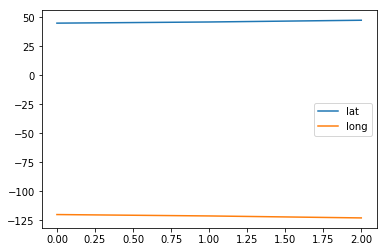

In [33]:
pandas_df.plot()

What?

Oh no, this is just a table of numbers and strings. Pandas doesn't know what 'lat' and 'long' are supposed to mean.

What if we try making the data into a GeoDataFrame?

In [34]:
data = [['a',45,-120],['b',46,-121.2],['c',47.5,-122.9]]
geopandas_df = geopandas.GeoDataFrame(data,columns=['name','lat','long'])
print geopandas_df
geopandas_df.plot()

  name   lat   long
0    a  45.0 -120.0
1    b  46.0 -121.2
2    c  47.5 -122.9


AttributeError: No geometry data set yet (expected in column 'geometry'.

THAT error doesn't look good.

Look at the bottom of the error. There's no valid geometry column. It doesn't recognize lat and long separately. 

Let's try again, this time, making a geometry column. We'll do it in stages: 

1. Make a Pandas DataFrame
2. Make a GeoSeries that has the coordinates as 'Points' 
3. Make a GeoDataFrame that has the GeoSeries as the geometry column and the DataFrame as the attribute data.

Some discussion of a few tricks used along the way comes after the map!

In [36]:
import shapely
import shapely.geometry
import fiona
import fiona.crs

data = [['a',45,-120],['b',46,-121.2],['c',47.5,-122.9]]
pandas_df = pandas.DataFrame(data,columns=['name','lat','long'])
print "The original Pandas DataFrame:"
print pandas_df

print
CoordinateTuples_list = zip(pandas_df['long'], pandas_df['lat'])
print "CoordinateTuples_list: "
print CoordinateTuples_list 

print
geometry_list = [shapely.geometry.Point(CoordinateTuple) for CoordinateTuple in CoordinateTuples_list]
print "geometry_list: "
print geometry_list

print
geometry_gs = geopandas.GeoSeries(geometry_list)
print "geometry_gs, a GeoSeries:"
print str(geometry_gs) 

print
geopandas_gdf = geopandas.GeoDataFrame(
    pandas_df,
    geometry=geometry_gs,
)
geopandas_gdf.crs=fiona.crs.from_epsg(4326)   # don't miss this line.
print "GeoDataFrame:"
print geopandas_gdf

#############
# plot it out in a slippy map

import folium
map_threepoints = folium.Map(location=[46.5, -122.309646],
                            zoom_start=7,
                            tiles='Stamen Terrain')

threepoints = folium.features.GeoJson(geopandas_gdf.to_json())

map_threepoints.add_children(threepoints)

map_threepoints

The original Pandas DataFrame:
  name   lat   long
0    a  45.0 -120.0
1    b  46.0 -121.2
2    c  47.5 -122.9

CoordinateTuples_list: 
[(-120.0, 45.0), (-121.2, 46.0), (-122.9, 47.5)]

geometry_list: 
[<shapely.geometry.point.Point object at 0x11c252dd0>, <shapely.geometry.point.Point object at 0x11b5acf90>, <shapely.geometry.point.Point object at 0x11c26b090>]

geometry_gs, a GeoSeries:
0        POINT (-120 45)
1      POINT (-121.2 46)
2    POINT (-122.9 47.5)
dtype: object

GeoDataFrame:
  name   lat   long             geometry
0    a  45.0 -120.0      POINT (-120 45)
1    b  46.0 -121.2    POINT (-121.2 46)
2    c  47.5 -122.9  POINT (-122.9 47.5)


/anaconda/envs/geopandas_dev/lib/python2.7/site-packages/ipykernel/__main__.py:45: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


Notes from the above:

_zip()_ is a convenient way of taking two lists, e.g., [1,2,3] and [a,b,c] and making them into: [(1,a),(2,b),(3,c)]. Here, we used it to make long-lat pairs to feed into Shapely geometry Point objects...

    zip(pandas_df['long'], pandas_df['lat'])

Then, below, is a 'list comprehension', a basic Python way of abbreviating a loop used to construct a list:

    geometry_list = [shapely.geometry.Point(CoordinateTuple) for CoordinateTuple in CoordinateTuples_list]

...what this line above means is:

    geometry_list = []
    for CoordinateTuple in CoordinateTuples_list:
        geometry_list.append(shapely.geometry.Point(CoordinateTuple))   

We can also read and write from files using [Geo]Pandas. You've seen GeoPandas reading Shapefiles, but let's write and read data to a CSV table just as an example. There are a lot of options (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html), but we won't use them here. 

Also note, in the Pandas help (http://pandas.pydata.org/pandas-docs/stable/io.html), you can see that Pandas can also communicate with various databases.

In [37]:
data = [['a',45,-120],['b',46,-121.2],['c',47.5,-122.9]]
pandas_df = pandas.DataFrame(data,columns=['name','lat','long'])

pandas_df.to_csv("LongLatDataFrame.csv")

another_df = pandas.read_csv("LongLatDataFrame.csv")
print "The dataframe, read back in."
print "type: "+str(type(another_df))
another_df

The dataframe, read back in.
type: <class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,name,lat,long
0,0,a,45.0,-120.0
1,1,b,46.0,-121.2
2,2,c,47.5,-122.9


If you open up the CSV file, you can see where the "Unnamed: 0" comes from. It's the index being written out. So we could have read it back in properly by setting the option _index_col=0, as we do below. 

We can even try writing the GeoDataFrame out as a CSV...
...and reading it back in...as a DataFrame, not as a GeoDataFrame.

In [38]:
geopandas_gdf.to_csv("LongLatGeoDataFrame.csv")

third_df = pandas.read_csv("LongLatGeoDataFrame.csv",index_col=0)
print "The geodataframe, read back in from a file... this time, as only a pandas dataframe (!?)"
print "type: "+str(type(third_df))
third_df

The geodataframe, read back in from a file... this time, as only a pandas dataframe (!?)
type: <class 'pandas.core.frame.DataFrame'>


,name,lat,long,geometry
0,a,45.0,-120.0,POINT (-120 45)
1,b,46.0,-121.2,POINT (-121.2 46)
2,c,47.5,-122.9,POINT (-122.9 47.5)


That _looks_ like it's a GeoDataFrame, but: 

* It's only a Pandas DataFrame.

* You find this out if you try to convert it into a GeoDataFrame by writing *geopandas.GeoDataFrame(third_df)*, you figure out that the 'geometry' column isn't _really_ populated by proper geometry objects, it's just populated by text. Luckily, the content of these strings is still geometry written in "Well-Known Text" (WKT). This means that you _can_ actually convert it back to valid geometry and eventually a valid GeoDataFrame. Let's try.  First, an example.

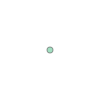

In [39]:
import shapely
import shapely.wkt
shapely.wkt.loads('POINT(-120 45)')

In [40]:
newGeometryGeoSeries = geopandas.GeoSeries(
    [shapely.wkt.loads(pointtext) for pointtext in third_df['geometry']]
)

newGeometryGeoSeries

0        POINT (-120 45)
1      POINT (-121.2 46)
2    POINT (-122.9 47.5)
dtype: object

In [41]:
reconstructed_gdf = geopandas.GeoDataFrame(
    third_df.copy(),
    geometry = newGeometryGeoSeries
)

reconstructed_gdf

,name,lat,long,geometry
0,a,45.0,-120.0,POINT (-120 45)
1,b,46.0,-121.2,POINT (-121.2 46)
2,c,47.5,-122.9,POINT (-122.9 47.5)


The reason the .copy() method is used above is that we want to make sure that the DataFrame doesn't have its data changed by any subsequent actions involving _reconstructed_gdf_. Perhaps because Pandas and GeoPandas data types are used with larger data within finite memory, they have been designed so that one has to manually specify when a copy of data needs to be made, otherwise, often, the original memory in the computer is used by multiple variables. This can be convenient for some purposes, but in this case, it can lead to a problem if you convert the data in third_df into a GeoDataFrame but then want to still access third_df. Thus we use a copy of third_df, third_df.copy(). You may want to use .copy() when you are unclear--the only harm is lost memory and time, not incorrect results.

Instead of making a map to prove that a correct GeoDataFrame was reconstructed, I'll just direct you to the GeoJSON, which now has valid coordinates:

In [42]:
print reconstructed_gdf.to_json()

{"type": "FeatureCollection", "features": [{"geometry": {"type": "Point", "coordinates": [-120.0, 45.0]}, "type": "Feature", "id": "0", "properties": {"lat": 45.0, "name": "a", "long": -120.0}}, {"geometry": {"type": "Point", "coordinates": [-121.2, 46.0]}, "type": "Feature", "id": "1", "properties": {"lat": 46.0, "name": "b", "long": -121.2}}, {"geometry": {"type": "Point", "coordinates": [-122.9, 47.5]}, "type": "Feature", "id": "2", "properties": {"lat": 47.5, "name": "c", "long": -122.9}}]}


Have fun exploring more GeoPandas operations!